# **Hotel ressource management** :
## **Reservation Concelation prediction** 

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import  SVC


from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import  OrdinalEncoder , OneHotEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import  classification_report,confusion_matrix,accuracy_score

sns.set_palette('colorblind')
sns.set_style('white')

In [2]:
df = pd.read_csv("Hotel Reservations.csv")
df.head(4)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled


In [3]:
df.shape

(36275, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [22]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


<Axes: >

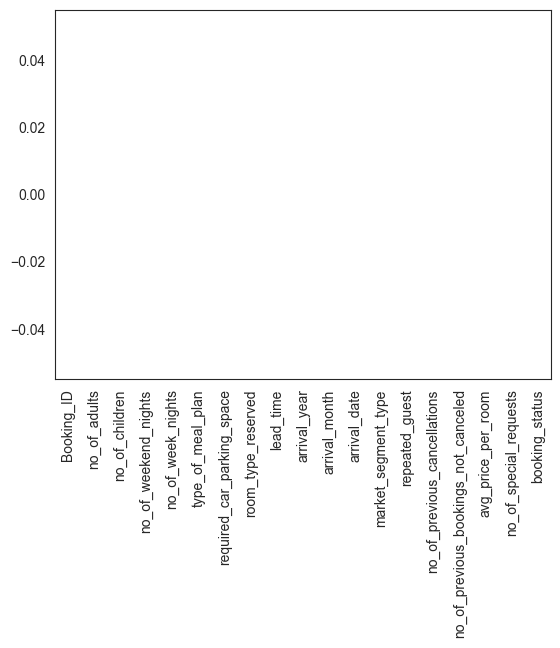

In [5]:
df.isna().sum().plot(kind='bar')

<Axes: >

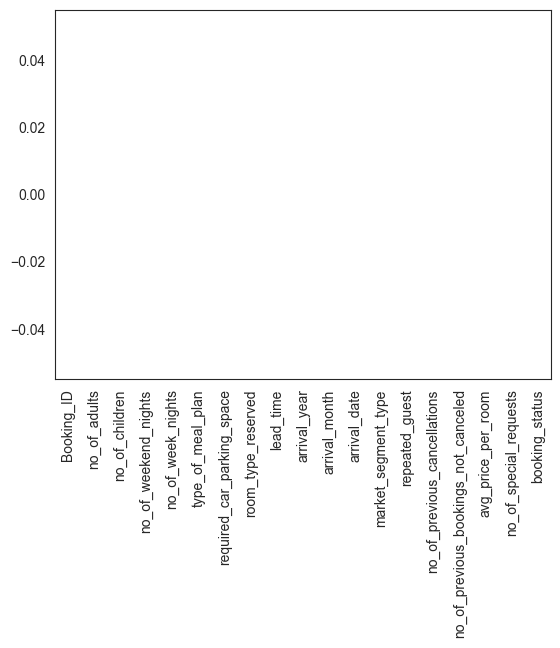

In [6]:
df.isnull().sum().plot(kind='bar')

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
col_10_obj_int = [col for col in df.columns if (df[col].dtype == 'object' or df[col].dtype == 'int64') and len(df[col].unique()) <= 10]

In [9]:
for col in col_10_obj_int :
    print(f'the column name is : {col}')
    print(df[col].unique())
    print('--'*50)

the column name is : no_of_adults
[2 1 3 0 4]
----------------------------------------------------------------------------------------------------
the column name is : no_of_children
[ 0  2  1  3 10  9]
----------------------------------------------------------------------------------------------------
the column name is : no_of_weekend_nights
[1 2 0 4 3 6 5 7]
----------------------------------------------------------------------------------------------------
the column name is : type_of_meal_plan
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
----------------------------------------------------------------------------------------------------
the column name is : required_car_parking_space
[0 1]
----------------------------------------------------------------------------------------------------
the column name is : room_type_reserved
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
----------------------------------------

In [10]:
len(col_10_obj_int)

12

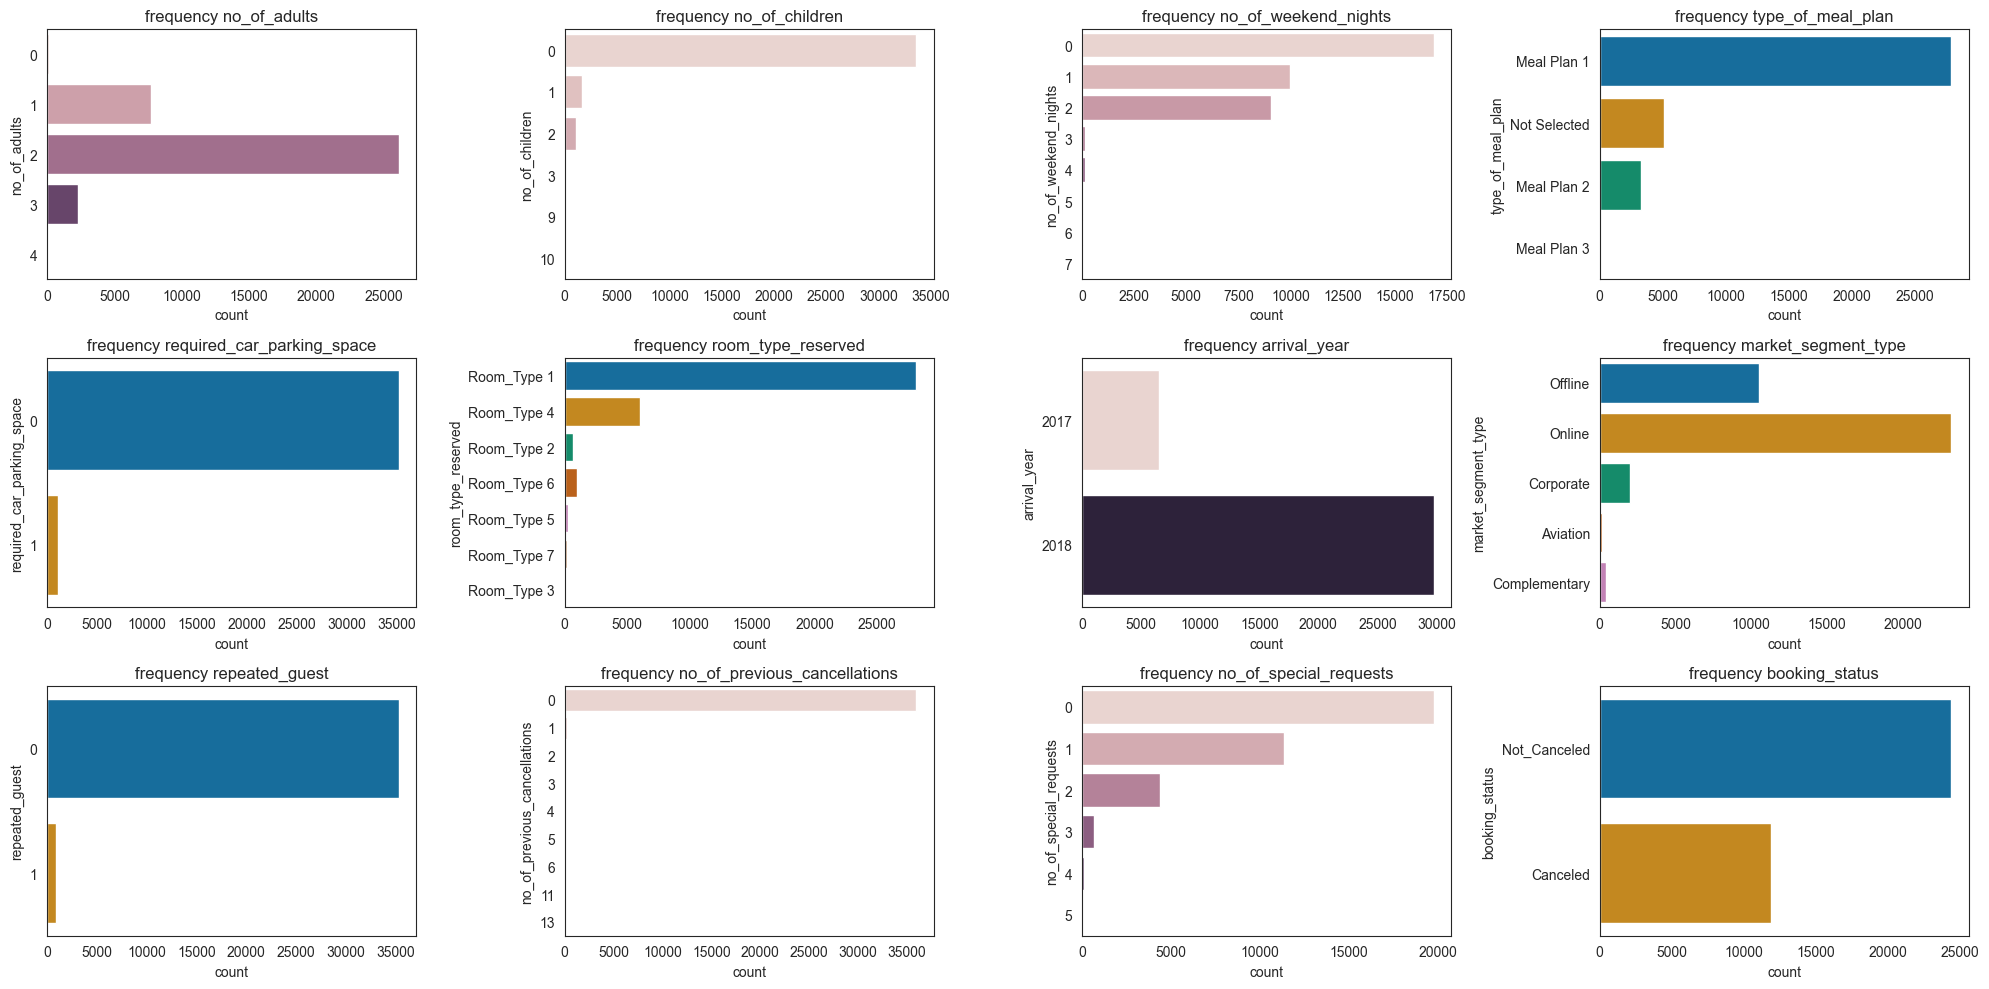

In [12]:
fig , ax = plt.subplots(3,4,figsize=(20,10))
ax = ax.flatten()

for i ,col in enumerate(col_10_obj_int):
    sns.countplot(df,y=col,hue=col,width=0.8,ax=ax[i],legend=False)
    ax[i].set_title(f'frequency {col}')
plt.tight_layout()    


In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

Text(0.5, 1.0, 'avg price by rooms types')

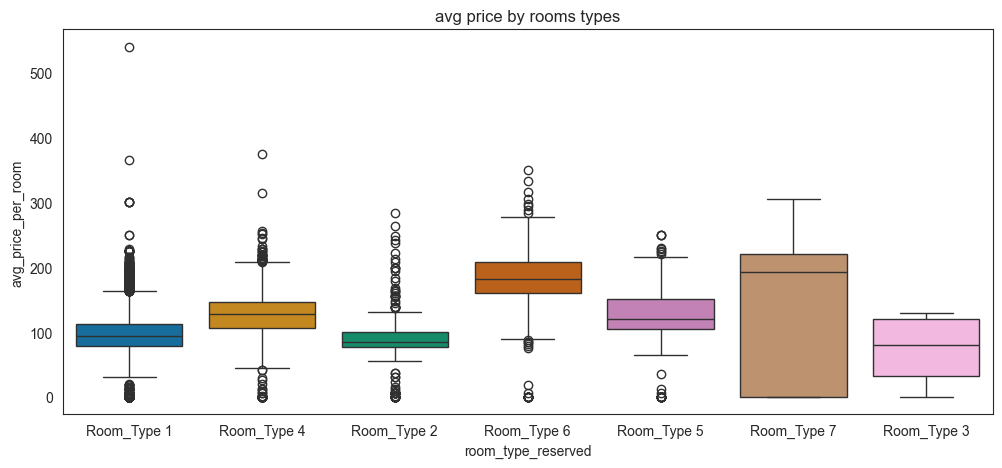

In [13]:
plt.figure(figsize=(12,5))
sns.boxplot(df,x='room_type_reserved',y='avg_price_per_room',hue='room_type_reserved')
plt.title('avg price by rooms types',loc='center')

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

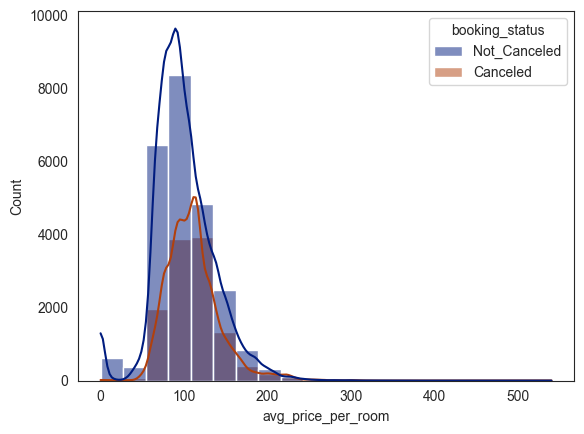

In [14]:
sns.histplot(x=df['avg_price_per_room'],kde=True,hue=df['booking_status'],palette='dark',alpha=0.5,bins=20)

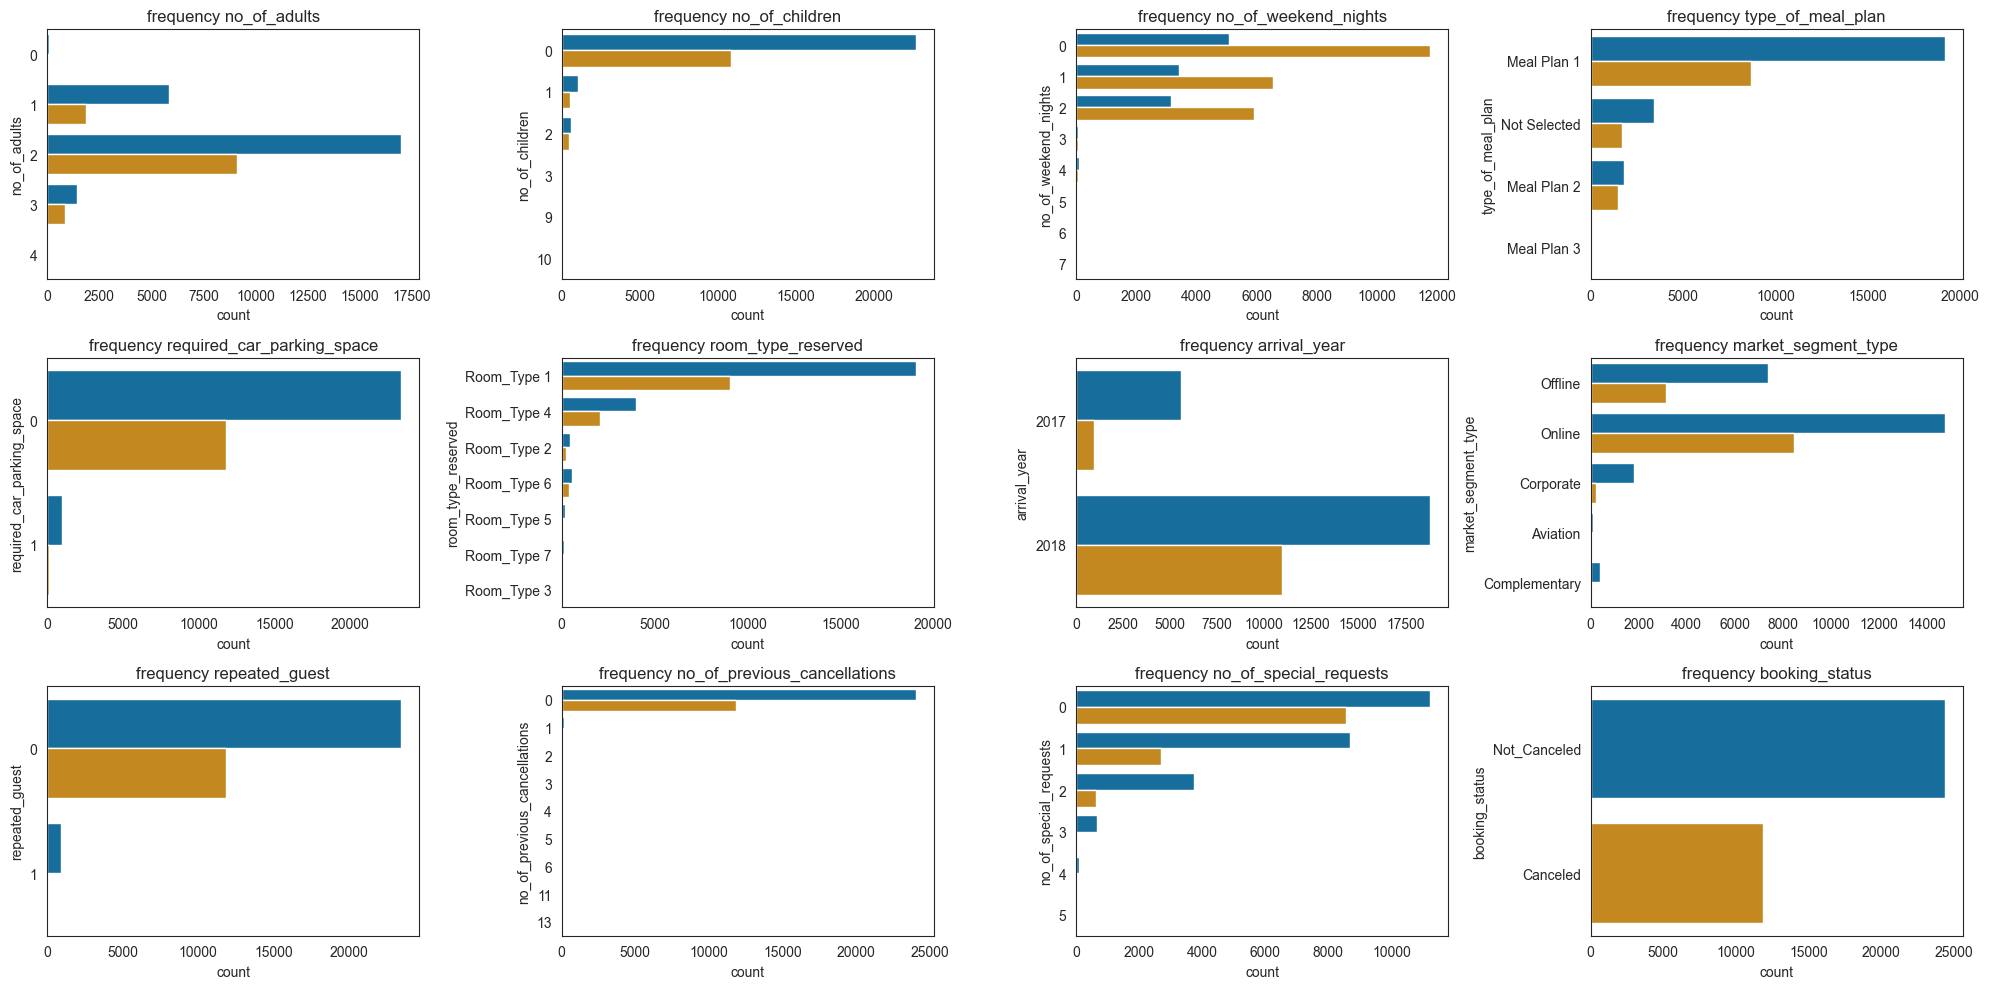

In [15]:
fig , ax = plt.subplots(3,4,figsize=(20,10))
ax = ax.flatten()

for i ,col in enumerate(col_10_obj_int):
    sns.countplot(df,y=col,hue='booking_status',width=0.8,ax=ax[i],legend=False)
    ax[i].set_title(f'frequency {col}')
plt.tight_layout()  

### **Concelation by reservation type**

<Axes: title={'center': 'Booking Status by Market Segment'}, xlabel='market_segment_type', ylabel='count'>

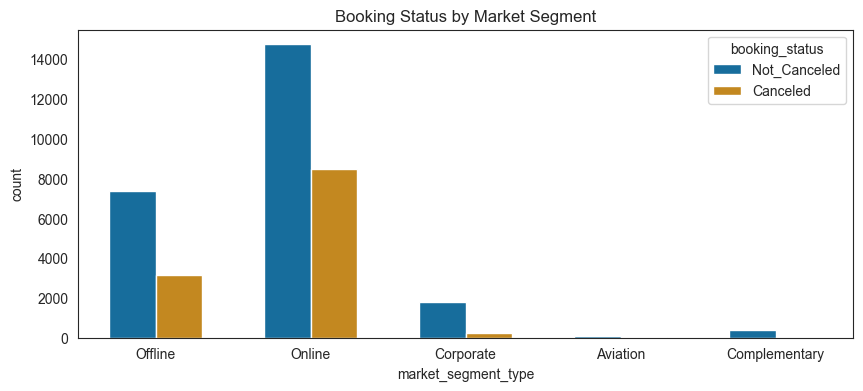

In [16]:
plt.figure(figsize=(10,4))
plt.title('Booking Status by Market Segment', fontdict={'family': 'arial'})
sns.countplot(df,x='market_segment_type',hue='booking_status',legend=True,width=0.6)

### **Concelation by rooms pref and options (parking,meals rooms type)**

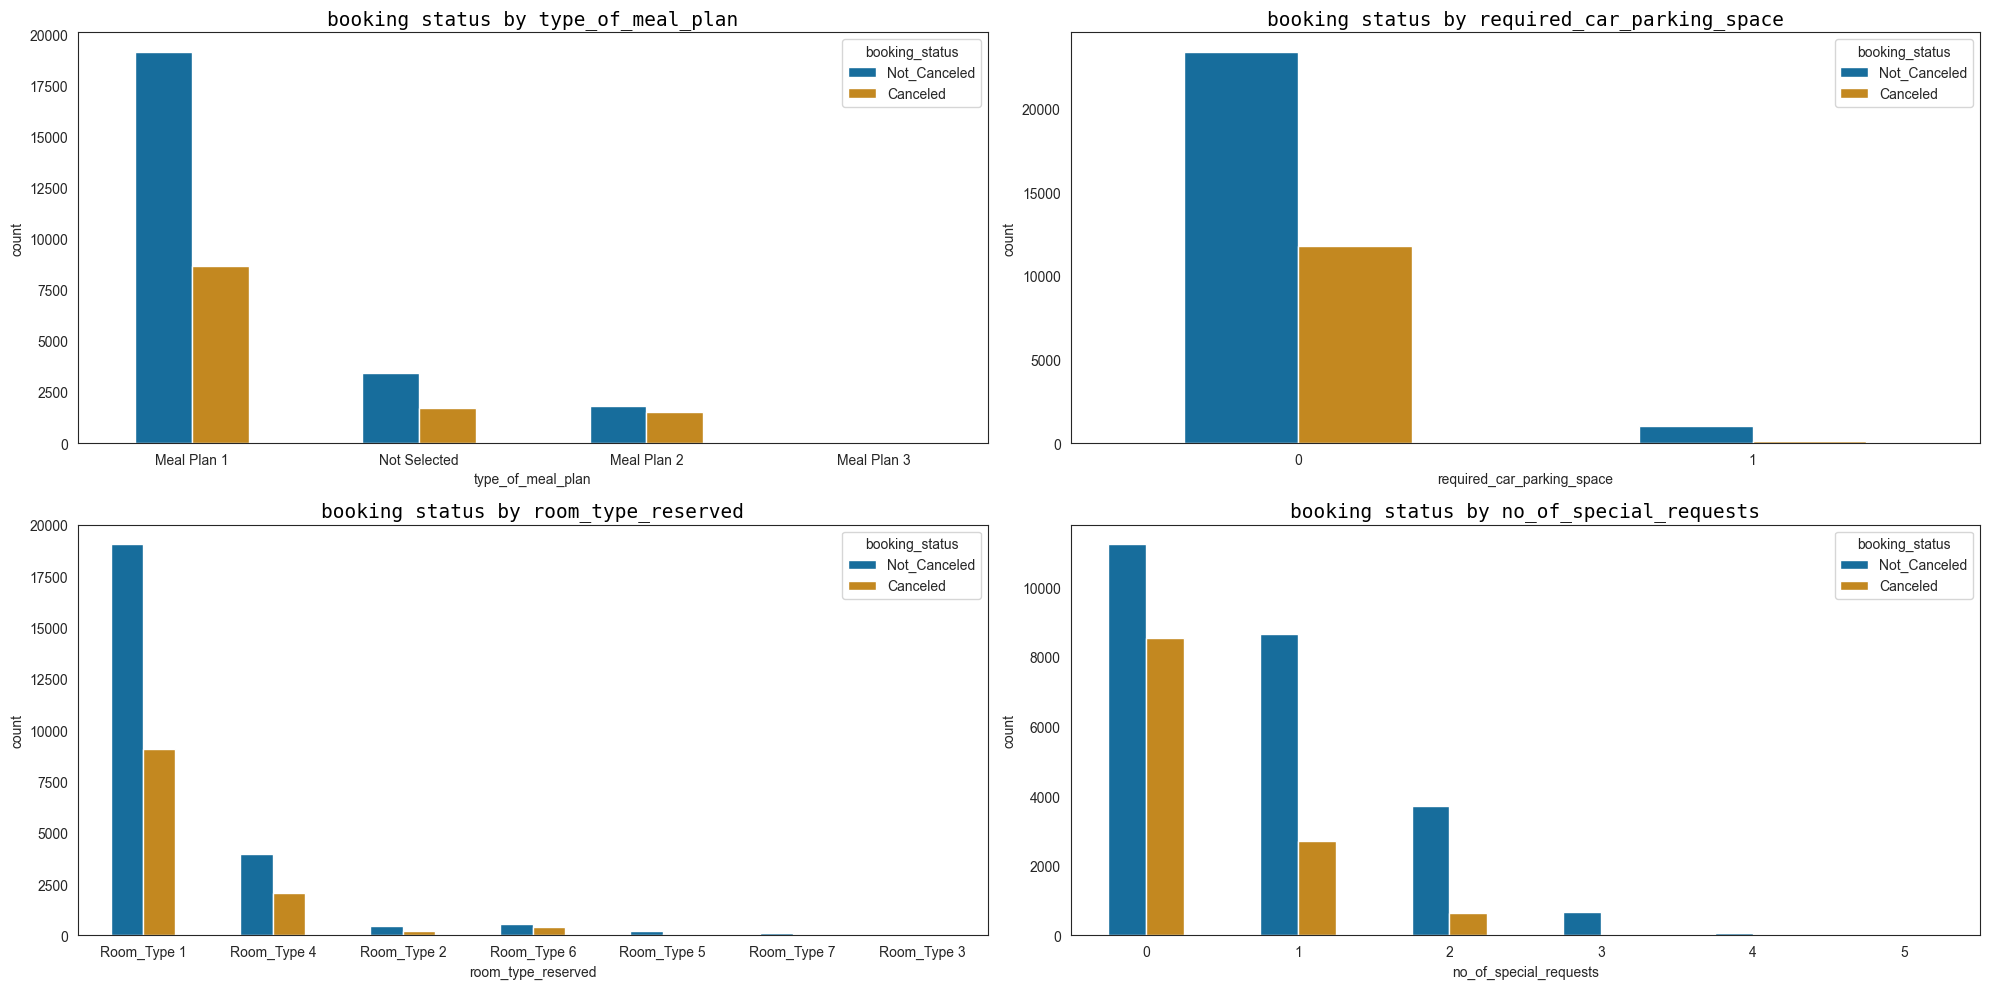

In [17]:
rooms_options = ['type_of_meal_plan','required_car_parking_space','room_type_reserved','no_of_special_requests']
fig, ax = plt.subplots(2,2,figsize=(20,10))
ax = ax.flatten()
for i , col in enumerate(rooms_options):
    sns.countplot(df,x=col,hue='booking_status',legend=True,ax=ax[i],width=0.5)
    ax[i].set_title(f'booking status by {col}',size=12,color='black',font='monospace',fontsize=14)
plt.tight_layout()


    

from the the 3 recent plots we can see that we have high cancelation when the client choose the room of type 1 and and the meal 1 and not car parking also 0 special requests meaning that the clients make a standard reservation , also we can see  that most concelation are from the online market segment  with total concelation of 8000 and the  and offline  market segments with 4000 situation in total 
we also observe that most canclations when the reservation is for 1 to 3 adults and no children , also this client have no history of previous concelations and they are not repeated guest 
from this descxpetive analysis we can see that they is a specific pattern for cancelation for example not having a cancelation history and not being  a repeated guest , for the rooms and servive preferences most concelation are made when the reserved room is type 1 and not special requests are asked 